In [1]:
import os
path = os.path.join('/home/santiago/Documents/dev/reservoirpy')
import sys
sys.path.insert(0,path)
import pandas as pd
import numpy as np
from reservoirpy.materialbalancepy import mbe as mb
from reservoirpy.pvtpy import black_oil as bl
import matplotlib.pyplot as plt

# Gas PVT

In [2]:
composition_dict = {
    'mole_fraction':[0.0194,0.004,0.9598,0.0023,0.0057,0.0062,0.0006,0.0003,0.0001,0.0005,0.001,0.0001],
    'compound':['carbon-dioxide','nitrogen','methane','ethane','propane','isobutane','n-butane','isopentane','n-pentane','n-hexane','n-heptane','n-octane']
     }


composition=bl.chromatography(composition_dict,normalize=True)
print(composition)

fm = 'cro_monserrate'
t= 122
monserrate_gas = bl.gas(formation=fm, temp=t, chromatography=composition)
monserrate_gas.pvt_from_correlations(end_pressure=2570)
print(monserrate_gas.pvt)

                mole_fraction formula        mw     ppc     tpc
compound                                                       
carbon-dioxide         0.0194     CO2   44.0100  1071.0   87.91
nitrogen               0.0040      N2   28.0134   493.1 -232.51
methane                0.9598     CH4   16.0430   666.4 -116.67
ethane                 0.0023    C2H6   30.0700   706.5   89.92
propane                0.0057    C3H8   44.0970   616.0  206.06
isobutane              0.0062   C4H10   58.1230   527.9  274.46
n-butane               0.0006   C4H10   58.1230   550.6  305.62
isopentane             0.0003   C5H12   72.1500   490.4  369.10
n-pentane              0.0001   C5H12   73.1500   488.6  385.80
n-hexane               0.0005   C6H14   86.1770   436.9  453.60
n-heptane              0.0010   C7H16  100.2040   396.8  512.70
n-octane               0.0001   C8H18  114.2310   360.7  564.22
                    z      rhog        bg       mug        cg
pressure                                  

In [3]:
gas_cap = mb.gas_reservoir(
    g = 1200e6,
    gas = monserrate_gas,
    pi = 820,
    
)

In [4]:
gas_cap.g

1200000000.0

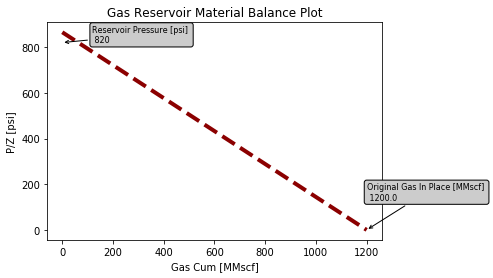

In [6]:
gas_cap.plot()